Wealthiest Neighborhood in Pittsburgh
 Author: Jayden Manson
 Submetric: Average Household Income
 Dataset: Pittsburgh SNAP Census Data (Education & Income)

In [8]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("Education_income_2010.csv")

df = df[['Neighborhood', "Est. Percent Under Poverty (2010)"]]

df = df.rename(columns={'Neighborhood': "neighborhood", "Est. Percent Under Poverty (2010)": "pct_under_poverty"})
df.columns
print(df.head(10))

        neighborhood pct_under_poverty
0   Allegheny Center             34.0%
1     Allegheny West              5.0%
2          Allentown             28.5%
3          Arlington             20.3%
4  Arlington Heights             57.7%
5         Banksville              5.8%
6  Bedford Dwellings             49.0%
7          Beechview             18.3%
8        Beltzhoover             23.5%
9         Bloomfield             19.4%


In [12]:
# Clean the poverty percentage data
df['pct_under_poverty'] = (
    df['pct_under_poverty']
    .astype(str)
    .str.replace('[%,]', '', regex=True)
    .str.strip()
)
df['pct_under_poverty'] = pd.to_numeric(df['pct_under_poverty'], errors='coerce')
df = df.dropna(subset=['pct_under_poverty'])

print(df['pct_under_poverty'])

0     34.0
1      5.0
2     28.5
3     20.3
4     57.7
      ... 
85    25.7
86     0.0
87    46.6
88     5.8
89     5.4
Name: pct_under_poverty, Length: 90, dtype: float64


In [13]:
# Sort by highest poverty rate (descending)
highest_poverty = df.sort_values(by="pct_under_poverty", ascending=False)
highest_poverty.head(10)


,neighborhood,pct_under_poverty
21,Chateau,100.0
10,Bluff,80.2
19,Central Oakland,64.8
14,California-Kirkbride,62.7
30,Esplen,60.7
57,Northview Heights,58.1
4,Arlington Heights,57.7
40,Homewood North,55.7
6,Bedford Dwellings,49.0
23,Crawford-Roberts,48.2


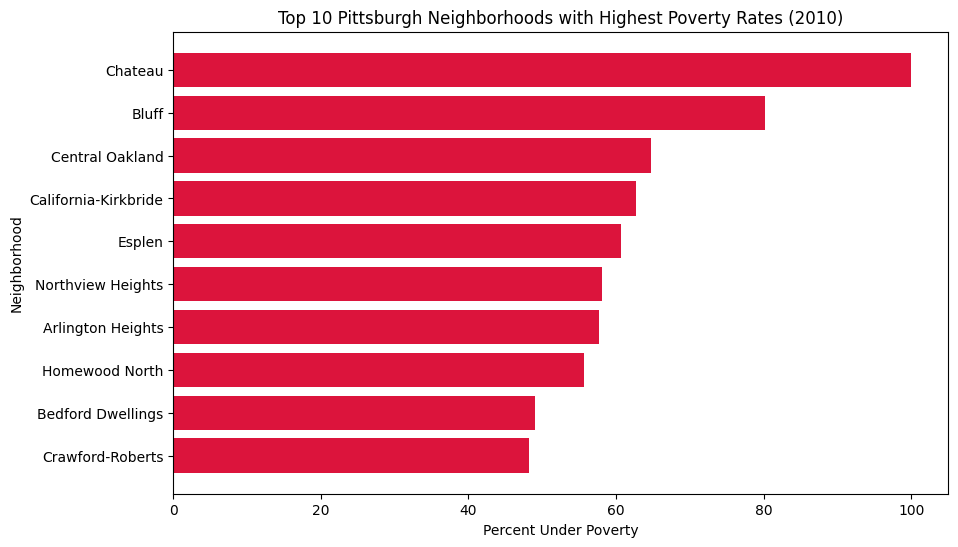

In [14]:
# Visualize top 10 neighborhoods with highest poverty rates
top10 = highest_poverty.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['neighborhood'], top10['pct_under_poverty'], color='crimson')
plt.xlabel("Percent Under Poverty", color='black')
plt.ylabel("Neighborhood", color='black')
plt.title("Top 10 Pittsburgh Neighborhoods with Highest Poverty Rates (2010)", color='black')
plt.gca().invert_yaxis()
plt.show()

In [15]:
# Sort by lowest poverty rate (ascending)
lowest_poverty = df.sort_values(by="pct_under_poverty", ascending=True)
lowest_poverty.head(10)

,neighborhood,pct_under_poverty
86,West End,0.0
56,North Shore,0.0
70,South Shore,0.0
65,Regent Square,1.1
81,Swisshelm Park,2.1
79,Strip District,2.1
45,Lincoln Place,3.6
78,Stanton Heights,4.2
62,Point Breeze,4.6
1,Allegheny West,5.0


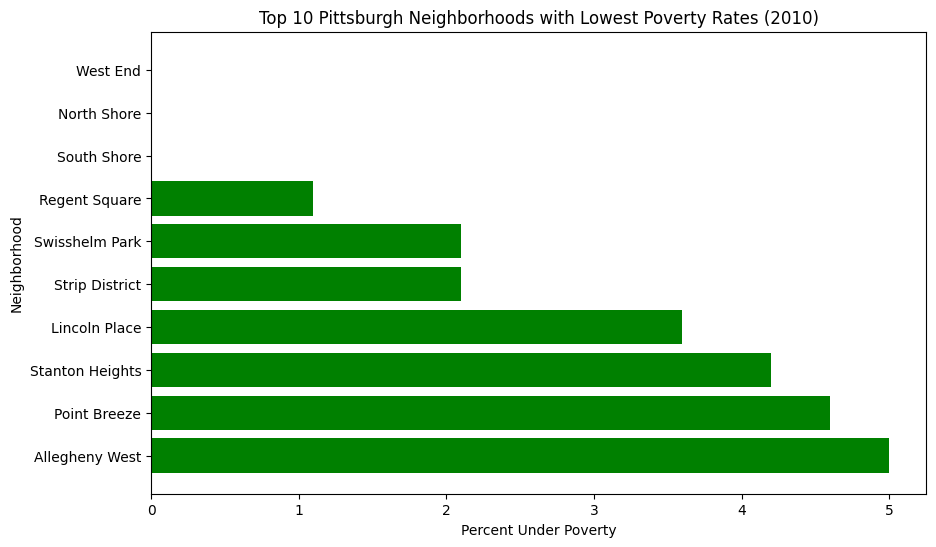

In [16]:
# Visualize top 10 neighborhoods with lowest poverty rates
bottom10 = lowest_poverty.head(10)
plt.figure(figsize=(10,6))
plt.barh(bottom10['neighborhood'], bottom10['pct_under_poverty'], color='green')
plt.xlabel("Percent Under Poverty", color='black')
plt.ylabel("Neighborhood", color='black')
plt.title("Top 10 Pittsburgh Neighborhoods with Lowest Poverty Rates (2010)", color='black')
plt.gca().invert_yaxis()
plt.show()

In [19]:
# Merge with neighborhoods geodataframe
merged = neighborhoods.merge(df, left_on='hood', right_on='neighborhood', how='left')
df['neighborhood'] = df['neighborhood'].replace({
    'Mt. Washington': 'Mount Washington',
    'S. Side Flats': 'South Side Flats',
    'Mt. Oliver': 'Mount Oliver'
})
print(df['neighborhood'])

0        Allegheny Center
1          Allegheny West
2               Allentown
3               Arlington
4       Arlington Heights
             ...         
85    Upper Lawrenceville
86               West End
87           West Oakland
88               Westwood
89                Windgap
Name: neighborhood, Length: 90, dtype: object


In [18]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

neighborhoods.columns

0        Allegheny Center
1          Allegheny West
2               Allentown
3               Arlington
4       Arlington Heights
             ...         
85    Upper Lawrenceville
86               West End
87           West Oakland
88               Westwood
89                Windgap
Name: neighborhood, Length: 90, dtype: object


In [60]:
merged = neighborhoods.merge(df, left_on='hood', right_on='neighborhood', how='left')
df['neighborhood'] = df['neighborhood'].replace({
    'Mt. Washington': 'Mount Washington',
    'S. Side Flats': 'South Side Flats',
    'Mt. Oliver':'Mount Oliver'
})
print(df['neighborhood'])

0        Allegheny Center
1          Allegheny West
2               Allentown
3               Arlington
4       Arlington Heights
             ...         
85    Upper Lawrenceville
86               West End
87           West Oakland
88               Westwood
89                Windgap
Name: neighborhood, Length: 90, dtype: object


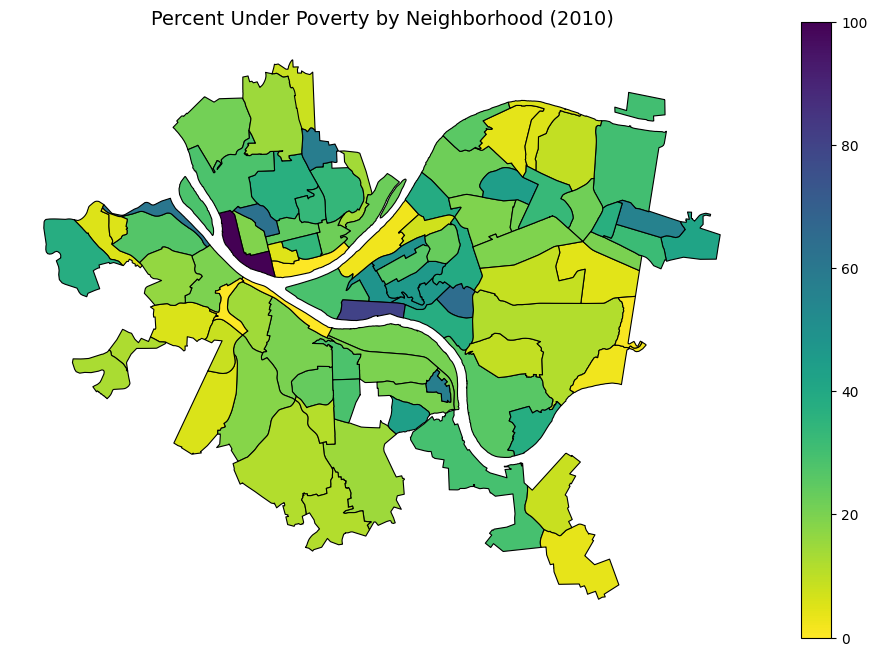

In [25]:
# Create pgh map
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='pct_under_poverty',
            cmap='viridis_r',
            linewidth=0.8,
            edgecolor='black',
            legend=True,
            ax=ax)

plt.title('Percent Under Poverty by Neighborhood (2010)', fontsize=14)
plt.axis('off')
plt.show()